In [84]:
import pandas as pd
import janitor 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedStratifiedKFold
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
#IMporting the dataset
df = pd.read_csv("C:/Users/DELL/Documents/Data Science/datasets_1/diabetes-1.csv").clean_names()

In [3]:
#viewing the first 10 rows 
df.head(10)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking for missing values 
df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [6]:
#checking for duplicates 
df.duplicated().sum()

0

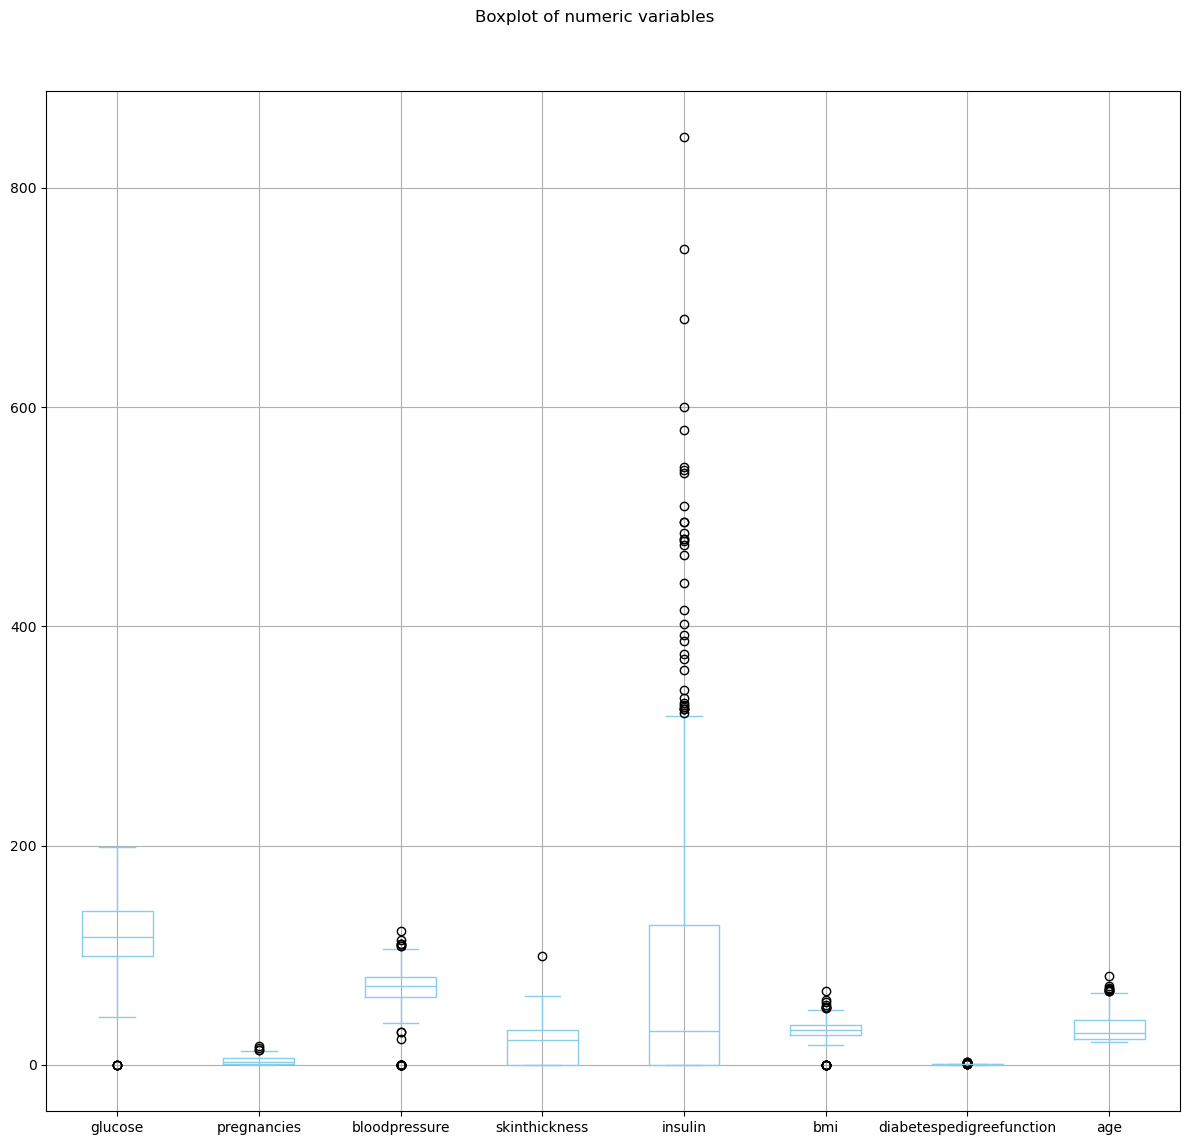

In [7]:
#plotting the boxplots of numeric varaibles 
numeric_var = ["glucose", "pregnancies", "bloodpressure", "skinthickness", "insulin", "bmi", "diabetespedigreefunction", "age"]

df[numeric_var].boxplot(figsize= (12,12), color ="skyblue")

plt.suptitle("Boxplot of numeric variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()



In [8]:
#replace the zeros in  bloodpressure, bmi and glucose

#compute the median of non-zero values
median_val = df.loc[df["glucose"]!= 0, "glucose"].median()

#replace the zeros
df["glucose"] = df["glucose"].replace(0, median_val)


##For bloodpressure 
#compute the median of non-zero values
median_val_b = df.loc[df["bloodpressure"]!= 0, "bloodpressure"].median()

#replace the zeros
df["bloodpressure"] = df["bloodpressure"].replace(0, median_val_b)


#For bmi 
#compute the median of non-zero values
median_val_bm = df.loc[df["bmi"]!= 0, "bmi"].median()

#replace the zeros
df["bmi"] = df["bmi"].replace(0, median_val_bm)


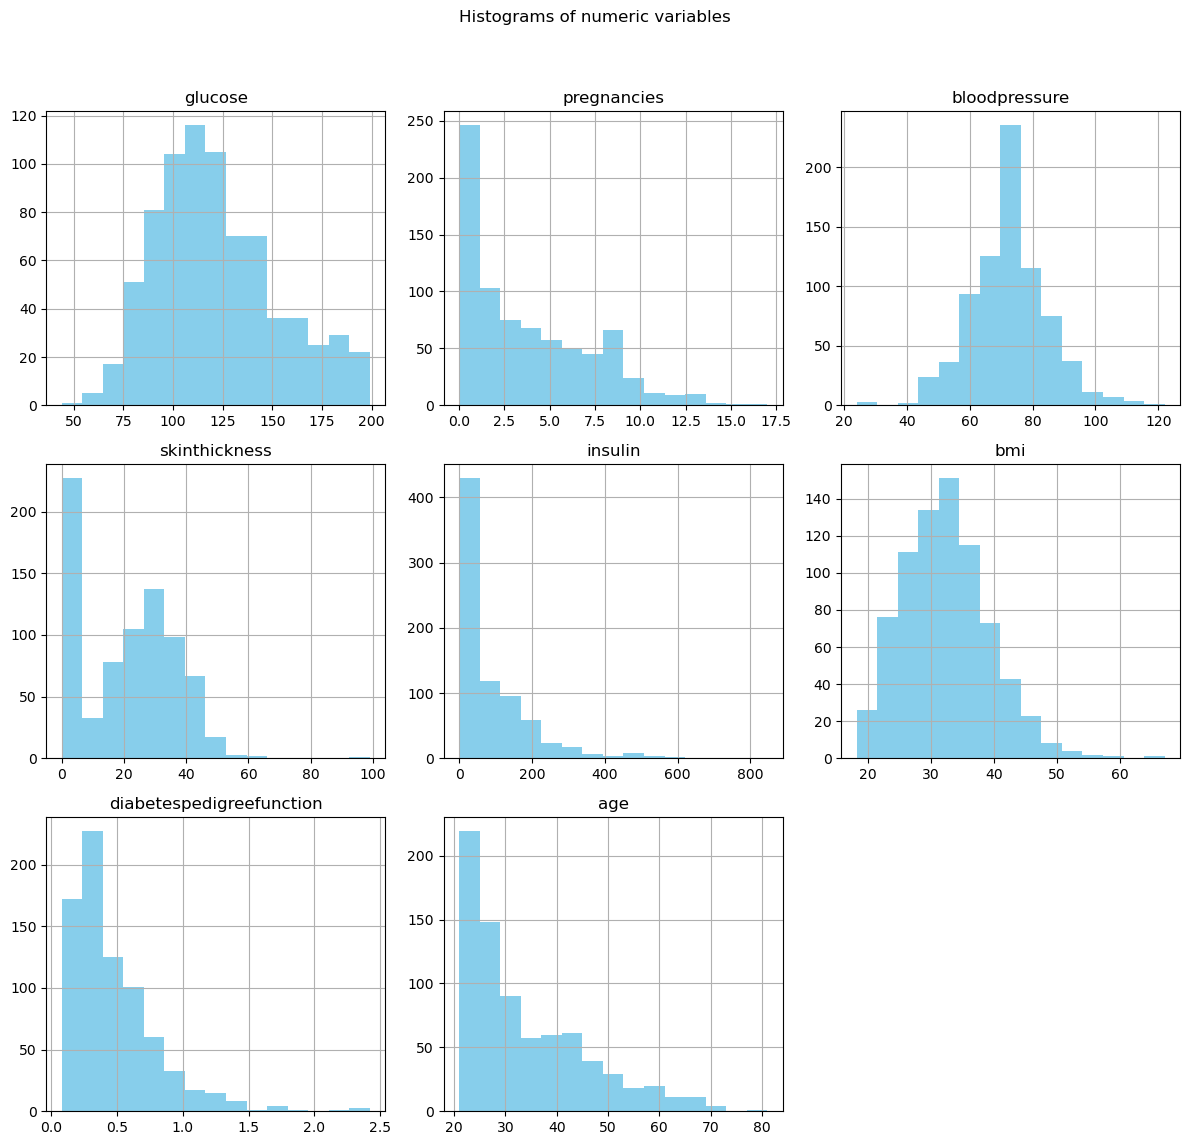

In [9]:
numeric_var = ["glucose", "pregnancies", "bloodpressure", "skinthickness", "insulin", "bmi", "diabetespedigreefunction", "age"]

df[numeric_var].hist(figsize= (12,12), bins = 15, color ="skyblue")

plt.suptitle("Histograms of numeric variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()

**TARGET VARIABLE**

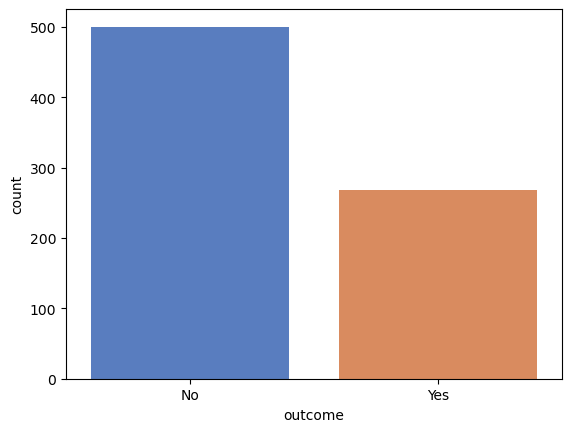

In [10]:
sns.countplot(x = df["outcome"], palette = "muted")
plt.xticks(["0", "1"], ["No", "Yes"])
plt.show()

In [11]:
#assesing the target variable
print(df['outcome'].value_counts(normalize=True)*100)

outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


**FITTING THE MODELS**

In [12]:
#defining predictors and the variables 
X = df.drop(columns = ['outcome'])
y = df['outcome']

In [13]:
#defining the training and the testing split 
X_train, X_test,  y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

**Handling Class Imbalance**

In [14]:
#we only oversample the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#the distribution of y
print("After smote", Counter(y_train))

After smote Counter({0: 400, 1: 400})


In [27]:
#defining the cross validation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 123)

**Logistic Regression**

In [15]:
#defing the model
log_model = LogisticRegression()

#Fitting the model

model = log_model.fit(X_train, y_train)

#Making Predictions

l_pred = model.predict(X_test)

In [16]:
#
log_testing_accuracy = accuracy_score(y_test, l_pred)
#Accuracy score 
print(f"Logistic  Testing Accuracy: {log_testing_accuracy:.4f}")

Logistic  Testing Accuracy: 0.7597


In [17]:
#Training Accuracy 
log_train = model.predict(X_train)

log_trainig_accuracy = accuracy_score(y_train, log_train)
#Accuracy score 
print(f"Logistic  Training Accuracy: {log_trainig_accuracy:.4f}")

Logistic  Training Accuracy: 0.7500


In [18]:
#Classification Report 
print(f"Logistic Classification Report:\n {classification_report(y_test, l_pred)}")

Logistic Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



In [19]:
 #Computing the AUC 
fpr, tpr, thresholds = roc_curve(y_test, l_pred)
 log_roc_auc = auc(fpr, tpr)
 print(f"Logistic AUC: {log_roc_auc}")

Logistic AUC: 0.7596296296296297


**Naive Bayes Model**

In [22]:

# Naive Bayes Algorithm 
naive = GaussianNB ()

#defining the parameter grid

param_grid = { 'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6]
             }

In [28]:
#defining the grid search 
naive_grid = GridSearchCV(estimator = naive, param_grid = param_grid, n_jobs = -1, cv = cv, verbose = 1)
#  verbose = 1 Prints progress messages while training (helpful to see what's happening).

In [29]:
n_model = naive_grid.fit(X_train, y_train)

Fitting 40 folds for each of 4 candidates, totalling 160 fits


In [34]:
#Naive Bayes Training Accuracy
naive_train = n_model.predict(X_train)

naive_train_accuracy = accuracy_score(y_train, naive_train)
#Accuracy Score 
print(f"Naive Training Accuracy: {naive_train_accuracy:.4f}")

Naive Training Accuracy: 0.7412


In [35]:
#making Predictions 
naive_pred = n_model.predict(X_test)

In [36]:
#Accuracy Score 
naive_test_accuracy = accuracy_score(y_test, naive_pred)
print(f"Naive Testing Accuracy: {naive_test_accuracy:.4f}")

Naive Testing Accuracy: 0.7013


In [37]:
#Classification Report 
print(f"Naive Bayes Classification report:\n {classification_report(y_test, naive_pred)}")

Naive Bayes Classification report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       100
           1       0.56      0.69      0.62        54

    accuracy                           0.70       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [38]:
#AUC SCORE

fpr, tpr, thresholds = roc_curve(y_test, naive_pred)
naive_roc_auc = auc(fpr, tpr)
print(f"Naive Bayes AUC: {naive_roc_auc:.4f}")

Naive Bayes AUC: 0.6976


**FITTING DECISION TREES MODEL**

In [41]:
decision_model = DecisionTreeClassifier(random_state = 123)

In [42]:
decision_model = DecisionTreeClassifier(random_state = 123)


#defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
#Grid Search
grid_dt = GridSearchCV(estimator = decision_model, param_grid = param_grid, n_jobs = -1, scoring = "f1",
                       error_score = 0, cv = cv)

In [44]:
#fitting the best model 
model = grid_dt.fit(X_train, y_train)


**Training Accuracy**

In [45]:
#Making Predictions 
dec_train = model.predict(X_train)
dec_accuracy = accuracy_score(y_train, dec_train)
print(f"Decision Training Accuracy: {dec_accuracy:.4f}")

Decision Training Accuracy: 0.8063


**Testing Accuracy**

In [46]:
#Making Predictions 
dec_pred = model.predict(X_test)
dec_test_accuracy = accuracy_score(y_test, dec_pred)
print(f"Decision Testing Accuracy: {dec_test_accuracy:.4f}")

Decision Testing Accuracy: 0.7662


In [47]:

#AUC SCORE

fpr, tpr, thresholds = roc_curve(y_test, dec_pred)
dec_roc_auc = auc(fpr, tpr)
print(f"Decision AUC: {dec_roc_auc:.4f}")

Decision AUC: 0.7817


In [48]:
#Classification Report 
print(f"Decision Classification report:\n {classification_report(y_test, dec_pred)}")

Decision Classification report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       100
           1       0.62      0.83      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.77       154



**Random Forest Model Fitting**

In [49]:
#setting the hyperparameters 
# number of trees 
n_estimators = [50,100,200]
#i want 10 random numbers starting from 10 to 80, linearly spaced as options in my parameter grid

#number of features to consider at each split
max_features = ['log2', 'sqrt'] 
# consider all the features all the square root of the features 

#maximum number of levels in a tree 
max_depth = [None, 10, 20, 30]

#minimum number of samples required to split a node
min_samples_leaf = [1,2,4]

#number of samples to be considered at each split
min_samples_split = [2, 5,10]

#whether boostrap samples are used 
bootstrap = [True, False]


#parameter grid 
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'bootstrap': bootstrap,}
print(param_grid)


{'n_estimators': [50, 100, 200], 'max_features': ['log2', 'sqrt'], 'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]}


In [52]:
#defining the model 
rf_model = RandomForestClassifier(random_state = 123)

In [53]:
#grid search
#defining the grid 
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

#model fitting 
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [54]:
#TRaining Accuracy 
rf_train = rf_grid.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train)
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")


Random Forest Training Accuracy: 1.0000


In [57]:
#Testing Accuracy 
rf_pred = rf_grid.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.4f}")


Random Forest Testing Accuracy: 0.7662


In [58]:
#Classification Report 
print(f"Random  Classification report:\n {classification_report(y_test, rf_pred)}")

Random  Classification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       100
           1       0.66      0.70      0.68        54

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [59]:
#AUC SCORE 
#AUC SCORE

fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
rf_roc_auc = auc(fpr, tpr)
print(f"Random  Forest AUC: {rf_roc_auc:.4f}")

Random  Forest AUC: 0.7519


**Support Vector Machines**

In [62]:
#defining the model
svm = SVC (probability = True)
#defining the the parameters 
param_grid = {"kernel": ["poly", "sigmoid", "rbf"],
    "C" : [0.001, 0.1, 1, 10, 100],
    "gamma" : ["scale",]}


In [63]:
#defining the grid search 
svm_grid = GridSearchCV(estimator = svm, param_grid= param_grid, n_jobs = -1, cv = cv, error_score = 0)

In [64]:
#fitting the model to fing the best parameters
sv_model = svm_grid.fit(X_train, y_train)

In [65]:
#Training Accuracy
svm_train = svm_grid.predict(X_train)
sv_train_accuracy = accuracy_score(y_train, svm_train)
print(f"Support  Training Accuracy: {sv_train_accuracy:.4f}")

Support  Training Accuracy: 0.7975


In [66]:
#Testing Accuracy
svm_pred = svm_grid.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_pred)
print(f"Support Testing Accuracy: {svm_test_accuracy:.4f}")

Support Testing Accuracy: 0.7403


In [67]:
#Classification Report 
print(f"Support  Classification report:\n {classification_report(y_test, svm_pred)}")

Support  Classification report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [68]:
#AUC SCORE 
#AUC SCORE

fpr, tpr, thresholds = roc_curve(y_test, svm_pred)
sv_roc_auc = auc(fpr, tpr)
print(f"Support Vector AUC: {sv_roc_auc:.4f}")

Support Vector AUC: 0.7319


**FITTING KNN MODEL**

Normalizing  the Predictors

In [73]:
#normalizing  the predictors 
scaler = MinMaxScaler ()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

**KNN MODEL FITTING**

In [76]:


knn = KNeighborsClassifier ()


In [77]:
#fitting the model 
knn_model = knn.fit(X_train_n, y_train)

In [78]:
#predictions 
knn_pred = knn_model.predict(X_test_n)

In [79]:
knn_testing_accuracy = accuracy_score(y_test, knn_pred)

print(f"KNN Testing Accuracy: {knn_testing_accuracy:.4f}")

KNN Testing Accuracy: 0.7013


In [80]:
knn_train = knn_model.predict(X_train_n)

knn_training_accuracy = accuracy_score(y_train, knn_train)

print(f"KNN Training Accuracy: {knn_training_accuracy:.4f}")

KNN Training Accuracy: 0.8600


In [81]:
#classsification report 
print(f'Classification Report:\n {classification_report(y_test, knn_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       100
           1       0.56      0.70      0.62        54

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



In [82]:
 #Computing the AUC 
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
 roc_auc = auc(fpr, tpr)
 print(roc_auc)

0.7018518518518517


**FITTING XGBOOST MODEL**

In [85]:
#Defining the model
xgb_model = xgb.XGBClassifier("binary:logistic",  eval_metric = "auc")

In [86]:
#defining the parameter grid

param_grid = {
    
    "learning_rate": [0.01, 0.1, 0.5 ],
    "max_depth": [ 3,4,6],
    "subsample" : [0.6,0.8,0.5],  #fraction of training data used per tree
    "colsample_bytree": [0.5,0.6,0.8], #fraction of features per tree
    "colsample_bylevel": [0.5,0.6,0.8],
    "colsample_bynode": [0.5,0.6,0.8],
    "reg_alpha" : [5,7,9],
    
    "reg_lambda": [3,5,7],
    "gamma" : [1,3,4],
    "n_estimators" : [100,300, 500]  
    
}

In [87]:
xg_grid = GridSearchCV(estimator = xgb_model, param_grid = param_grid, n_jobs = -1, verbose = 1, error_score = 0, cv = 3)

In [88]:
#FITTING THE MODEL 
xg_best_model = xg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 59049 candidates, totalling 177147 fits


In [89]:
#getting the best parameters 
xg_best_model.best_params_

{'colsample_bylevel': 0.8,
 'colsample_bynode': 0.5,
 'colsample_bytree': 0.5,
 'gamma': 3,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 500,
 'reg_alpha': 5,
 'reg_lambda': 3,
 'subsample': 0.8}

In [90]:
#making predictions 
xg_pred = xg_best_model.predict(X_train)


#training accuracy
x_training_accuracy = accuracy_score(y_train, xg_pred)
print(f"Training Accuracy: {x_training_accuracy:.4f}")

Training Accuracy: 0.7987


In [92]:
#Testing Accuracy
#making predictions 
xgb_pred = xg_best_model.predict(X_test)


#training accuracy
x_testing_accuracy = accuracy_score(y_test, xgb_pred)
print(f"Testing Accuracy: {x_testing_accuracy:.4f}")

Testing Accuracy: 0.7468


In [93]:
#More performance of the Testing Split

confusion_matrix = classification_report(y_test, xgb_pred)

print(f"CLassification Report/n: {confusion_matrix}")


CLassification Report/n:               precision    recall  f1-score   support

           0       0.87      0.72      0.79       100
           1       0.61      0.80      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154



In [96]:
#AUC SCORE 
 #Computing the AUC 
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)
x_roc_auc = auc(fpr, tpr)
print(x_roc_auc)

0.7581481481481481


In [100]:
#Saving the XGBoost model as it takes so long time to run
import pickle as pkl
pkl.dump(xg_best_model, open("XGBOOST_Diabetes_pima.sav", "wb"))

**COMPARING THE MODELS**

In [97]:
models = pd.DataFrame({
    "Model": ["KNN", "Logistic Regression", "Naive Bayes",  "Decision Tree", "Random Forest", "Support Vector", "XGBOOST"],
    "Training Accuracy" : [knn_training_accuracy, log_trainig_accuracy, naive_train_accuracy, dec_accuracy, rf_train_accuracy,
                           sv_train_accuracy, x_training_accuracy],
    "Testing Accuracy": [knn_testing_accuracy, log_testing_accuracy, naive_test_accuracy, dec_test_accuracy, rf_test_accuracy,
                         svm_test_accuracy, x_testing_accuracy],
    "AUC Score": [roc_auc, log_roc_auc, naive_roc_auc, dec_roc_auc, rf_roc_auc, sv_roc_auc, x_roc_auc]
})

##sorting the dataframe

models.sort_values(by = "AUC Score", ascending = False)


,Model,Training Accuracy,Testing Accuracy,AUC Score
3,Decision Tree,0.80625,0.766234,0.781667
1,Logistic Regression,0.75000,0.759740,0.759630
6,XGBOOST,0.79875,0.746753,0.758148
4,Random Forest,1.00000,0.766234,0.751852
5,Support Vector,0.79750,0.740260,0.731852
0,KNN,0.86000,0.701299,0.701852
2,Naive Bayes,0.74125,0.701299,0.697593


Based on the results above, the Decision Tree model demonstrates the strongest overall performance, achieving the highest AUC score and one of the top testing accuracies, indicating good generalization. In contrast, both KNN and Random Forest exhibit signs of overfitting, as evidenced by a significant gap between their training and testing accuracies. Among all models, Naive Bayes shows the weakest performance, with the lowest AUC and testing accuracy, suggesting poor generalization to unseen data.

**Comparing the classification reports of the top performing models**

In [98]:
#Classification report of Decision Tree
#Classification Report 
print(f"Decision Classification report:\n {classification_report(y_test, dec_pred)}")

Decision Classification report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       100
           1       0.62      0.83      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.80      0.77      0.77       154



In [99]:
#Classification Report 
print(f"Logistic Classification Report:\n {classification_report(y_test, l_pred)}")

Logistic Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



In the classification report, the Decision Tree model demonstrates a higher recall for class 1 (diabetic cases) compared to Logistic Regression. This makes it the more suitable choice for diabetes screening, where failing to identify a true positive case could have serious or even life-threatening consequences. Prioritizing recall helps ensure that as many individuals with diabetes as possible are correctly identified for further medical evaluation or intervention.

**SAVING THE DECISION TREES MODEL**

In [103]:
import pickle as pkl
pkl.dump(model, open("decision_trees_diabetes_pima.sav", "wb"))